# Анализ временных рядов в Python

Временной ряд — это набор данных, записанных в разные временные интервалы. Анализ временного ряда означает анализ данных временного ряда с использованием различных статистических инструментов и методов. В этом проекте анализируется набор данных временного ряда **Parking Birmingham**, загруженный из репозитория машинного обучения UCI.


## Содержание

1. Введение во временные ряды

2. Типы данных

3. Терминология временных рядов

4. Импорт пакетов Python

5. Импорт набора данных

6. Описание набора данных

7. Анализ разведочных данных

8. Индексирование с данными временных рядов

9. Повторная выборка данных временных рядов

10. Обработка пропущенных значений в данных временных рядов

11. Визуализация данных временных рядов

12. Сезонная декомпозиция с данными временных рядов

13. Модель временных рядов ARIMA

14. Выбор параметров для модели временных рядов ARIMA

15. Подгонка модели временных рядов ARIMA

16. Создание и визуализация прогнозов

17. Заключение

18. Литература

## 1. Введение во временные ряды

**Временные ряды** — это набор данных или наблюдений, записанных через разные или регулярные интервалы времени. В общем случае временные ряды — это последовательность набора данных, которые получены через равные интервалы времени. Частота записанных значений может быть выражена через часы, ежедный, еженедельный, ежемесячный, ежеквартальный или ежегодный интервал времени.

Анализ временных рядов охватывает статистические методы анализа данных временных рядов. Эти методы позволяют извлекать значимую статистику, закономерности и другие характеристики данных.

**Временные ряды** визуализируются с помощью линейных диаграмм. Таким образом, анализ временных рядов включает понимание неотъемлемых аспектов работы с временными рядами, чтобы  создавать точные прогнозы.

Приложения c временными рядами используются в статистике, финансах или бизнес-приложениях. Очень распространенным примером временных рядов является ежедневное значение закрытия фондового индекса, такого как NASDAQ или Dow Jones. Другие распространенные приложения временных рядов — прогнозирование продаж и спроса, прогнозирование погоды, эконометрика, обработка сигналов, распознавание образов и прогнозирование землетрясений.

В этом проекте проводится анализ временных рядов набора данных **Parking Birmingham**, загруженного из репозитория машинного обучения UCI.


## 2. Типы данных


**Анализ временных рядов** — это статистический анализ данных временных рядов. Данные временных рядов означают, что информация записывается в разные периоды или интервалы времени. Данные временных рядов могут быть трех типов:

1. **Данные временных рядов** — Наблюдения за значениями переменной, записанные в разные моменты времени, называются данными временных рядов.

2. **Поперечные данные** — Это данные одной или нескольких переменных, записанные в один и тот же момент времени.

3. **Объединенные данные** — это сочетание данных временных рядов и поперечных данных.


## 3. Терминология временных рядов

Определим основные термины:

1. **Зависимость (Dependence) **— Относится к взаимосвязи между двумя наблюдениями одной и той же переменной в предыдущие временные периоды.

2. **Стационарность (Stationarity)** — Указывает на то, что среднее значение ряда остается постоянным на протяжении всего временного периода. Если влияние прошлых событий накапливается и значения стремятся к бесконечности, условие стационарности не выполняется.

3. **Дифференцирование (Differencing)** — Используется для приведения ряда к стационарному состоянию и контроля автокорреляции. В некоторых случаях анализа временных рядов дифференцирование может не требоваться, а многократное дифференцирование может привести к неверным оценкам.

4. **Спецификация (Specification)** — Может включать тестирование линейных или нелинейных взаимосвязей зависимых переменных с использованием моделей временных рядов, таких как модели ARIMA.

5. **Экспоненциальное сглаживание (Exponential Smoothing)** — Метод, который предсказывает значение следующего периода на основе предыдущих и текущих данных. Он предполагает усреднение данных таким образом, чтобы несистематические компоненты отдельных наблюдений взаимно компенсировались. Экспоненциальное сглаживание используется для краткосрочного прогнозирования.

6. **Аппроксимация кривой (Curve fitting)** — Регрессия с аппроксимацией кривой в анализе временных рядов используется, когда данные имеют нелинейную зависимость.

7. **ARIMA** —  авторегрессионная интегрированная скользящая средняя.


## 4. Импорт пакетов Python


Для анализа временных рядов понадобятся пакеты Python — numpy, pandas, matplotlib и seaborn.

Если требуется, чтобы изображения были построены в  Jupyter Notebook, добавить  команду IPython %matplotlib в код.

Кроме этого, используем параметры построения графиков Seaborn по умолчанию с `sns.set()`.


In [ ]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()



## 5. Импорт набора данных


Импорт данных, которые будет использоваться в этом проекте с помощью функции pandas `read_csv()`.

In [ ]:
from google.colab import files

# Вызываем загрузку файла с локального компьютера
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# import dataset

data = 'dataset.csv'

df = pd.read_csv(data)


## 6. Dataset description

Используем набор данных `Parking Birmingham Data Set` для этого проекта. Набор данных - парковка автомобилей в городе Бирмингем в Великобритании.

Данные показывают уровень загруженности (с 8:00 до 16:30) автомобилей с 2016/10/04 по 2016/12/19. Набор данных содержит 35717 экземпляров и 4 атрибута.

Набор данных можно найти по следующему адресу:

https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham




## 7. Исследовательский анализ данных

Проверим размерность датафрейма с помощью метода **shape()**.

`df.shape`

In [ ]:
# view the shape of the dataframe

df.shape

В наборе данных 35717 записей и 4 столбца.

Далее выведем первые пять строк набора данных с помощью метода **head()**.

In [ ]:
# view the first five rows of dataset

df.head()

Столбец `LastUpdated` содержит дату и время, объединенные в один столбец временной метки. Требуется разделить на два отдельных столбца.

Используем методом **info()**, чтобы просмотреть краткую информацию по датафрейму.

In [ ]:
# view summary of dataframe

df.info()

Видно, что столбец `LastUpdated` имеет тип данных object. Требуется преобразовать его в формат datatime. Можно использовать метод pandas **to_datetime()**. Он даст два столбца `Date` и `Time` с разделенными датами.

преобразуем столбец `LastUpdated` в формат `datetime`

In [ ]:
# convert the lastUpdated column into datetime format

df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])

In [ ]:
# еще раз просмотрите сводку по dataframe

df.info()

Теперь  видим, что столбец `LastUpdated` имеет тип данных `datetime`. Разобьем этот столбец `LastUpdated` на два отдельных столбца `Date` и `Time`.

In [ ]:
df['Date'] = df['LastUpdated'].dt.date

df['Time'] = df['LastUpdated'].dt.time


Столбец «LastUpdated» теперь разделен на два отдельных столбца

In [ ]:
# again view the first ten rows of dataset

df.head(10)

Теперь удалим лишние столбцы из набора данных временного ряда.

In [ ]:
# remove redundant columns

cols = ['SystemCodeNumber', 'Capacity', 'LastUpdated']

df.drop(cols, axis=1, inplace=True)

Проверить типы данных столбцов.

In [ ]:
# check the data types of the columns

df.dtypes

идно, что столбец `Date` имеет тип данных `object`. Он должен иметь формат `datetime`. Преобразуем тип данных столбца `Date` из типа данных `object` в формат `datetime`. Метод `to_datetime()` библиотеки Pandas позволяет  преобразовать тип данных object в формат `datetime` библиотеки Python.

In [ ]:
# convert the data type of Date column

df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# again check the data type of df dataframe

df.dtypes

Теперь видим, что тип данных столбца `Date` — `datetime`.

## 8. Индексирование временных рядов

При работе с данными временных рядов в Python всегда необходимо устанавливать даты в качестве индекса. Поэтому определим столбец `Date` в качестве индекса фрейма данных.

In [ ]:
# set the index of the dataframe

df.set_index('Date', inplace=True)

df.index

Поле `dtype=datetime[ns]` состоит из объекта `datestamp`. `length=35717` предполагается, что  есть 35717 меток с датой. Параметр `freq=None` предполагает, что частота для метки даты не указана.


## 9. Повторная выборка временных рядов

Если более внимательно рассмотреть данные, увидим, что существуют разные временные промежутки в течение одного дня. С этим типом данных, как правило, сложно работать. Поэтому преобразуем набор данных в более удобный.

Используем функцию `resample()` из pandas dataframe, которая используется для  временных рядов. Она позволяет группировать временные ряды в блоки (1 день или 1 месяц), применим функцию к каждой группе (по среднему) и преобразуем выбранные данные.

In [ ]:
y=df['Occupancy'].resample('D').mean()

y.head(10)


Здесь термин `D` означает, что группируем данные в блоки по дням и вычисляем среднее значение в течении одного дня.

## 10. Обработка пропущенных значений временного ряда

Проверим пустые значения в данных временного ряда.

In [ ]:
y.isnull().sum()

Приведенная выше команда показывает, что во временном ряде присутствуют 4 дня с пропущенными значениями.

Заполним пропущенные значения с помощью команды pandas `fillna()`. Используем аргумент `method=bfill` для заполнения пропущенных значений.

Команда y.fillna(method='bfill', inplace=True) используется для заполнения пропущенных значений в данных (NaN) методом обратного заполнения (backfill). Вот что она делает:

method='bfill' (обратное заполнение):

Пропущенные значения (NaN) заполняются следующим доступным значением снизу по столбцу или индексу.
Например:

[1, NaN, NaN, 4]

после применения bfill станет:

[1, 4, 4, 4]

inplace=True:

Указывает, что изменения должны быть применены непосредственно к исходному объекту y, без создания его копии.

Если inplace=False (по умолчанию), то метод возвращает новый объект с заполненными значениями, а оригинальный объект остается неизменным.

In [ ]:
y.fillna(method='bfill', inplace=True)

Проверяем наличие пропущенных значений во временном ряду.

In [ ]:
y.isnull().sum()

временной ряд не содержит пропущенных значений.

## 11. 11. Визуализация данных временного ряда

Визуализация данных временного ряда является важным шагом в анализе временных рядов. Она поможет нам визуализировать несколько важных вещей,
таких как:-

-**сезонность**(**seasonality**) — отображают ли данные временного ряда сезонность или периодическую закономерность?

-**тренд**(**trend**) — отображают ли данные временного ряда постоянный восходящий или нисходящий наклон?

-**шум**(**noise**) — есть ли какие-либо выбросы или пропущенные значения, которые не соответствуют данным временного ряда?

Визуализация помогает ответить на эти вопросы.


In [ ]:
# visualize the time series data

y.plot(figsize=(15, 6))

plt.show()


Приведенный выше график показывает интересную закономерность во временном ряде. Он имеет сезонный характер, но не демонстрирует возрастающего или убывающего тренда. Из графика видно, что заполняемость (Occupancy) увеличивается в декабре. Возможно, это связано с празднованием Рождества в декабре.

## 12. Сезонная декомпозиция временных рядов

Есть еще один метод визуализации данных временных рядов. Этот метод называется **декомпозицией временных рядов**. Он позволяет разложить временные ряды на три отдельных компонента — тренд, сезонность и шум.

Python предоставляет модуль `statsmodels`, который предоставляет инструменты и методы для статистического анализа и моделирования. Этот модуль `statsmodels` предоставляет функцию `seasonal_decompose` для выполнения сезонной декомпозиции.

Сезонная декомпозиция возвращает число относительно небольшого размера. Поэтому первые две строки фрагмента кода гарантируют, что выходное число будет достаточно большим для визуализации. Выполнить сезонную декомпозицию в Python с помощью следующих строк кода:-

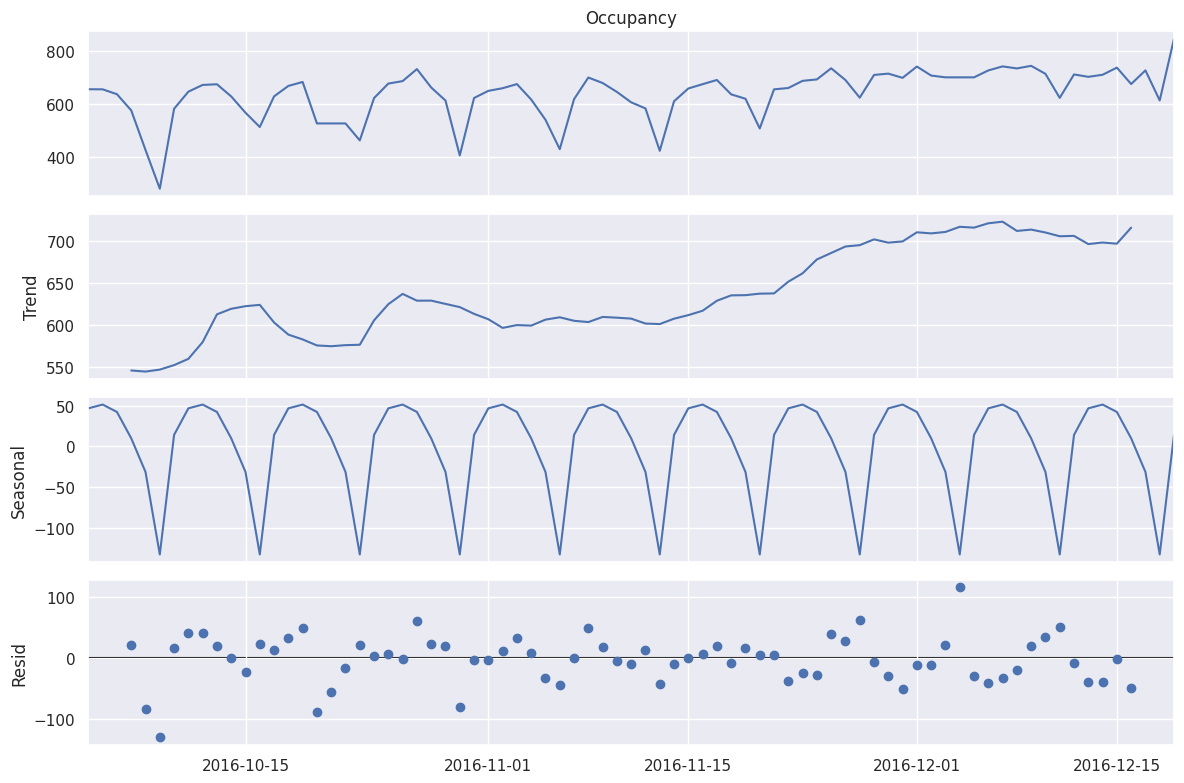

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()

plt.show()

Разложение временных рядов позволяет легко визуализировать данные в понятной форме. Это помогает идентифицировать вариации во временных рядах.

Приведенный выше график показывает восходящую тенденцию во временных рядах. Его можно использовать для понимания структуры временных рядов. Разложение временных рядов важно, поскольку многие методы прогнозирования построены на этой концепции структурированного разложения для создания прогнозов.

## 13. Модель временных рядов ARIMA

Один из наиболее распространенных методов, используемых в прогнозировании временных рядов, известен как **модель ARIMA**. ARIMA означает **Авторегрессивное интегрированное скользящее среднее**. Это обобщение модели авторегрессивного скользящего среднего (ARMA). Эти модели подгоняются под данные временных рядов для лучшего понимания данных или для прогнозирования будущих значений в ряде, называемых **прогнозированием**.

Часть AR в ARIMA указывает, что интересующая нас переменная, регрессирует на основе предыдущих значений. Часть MA указывает, что ошибка регрессии на самом деле является линейной комбинацией членов ошибки. I (от «интегрированный») указывает, что значения данных были заменены разницей между их значениями и предыдущими значениями (и этот процесс дифференцирования мог быть выполнен более одного раза). Цель этих функций — сделать так, чтобы модель максимально хорошо соответствовала данным.

Существует три различных целых числа (p, d, q), которые используются для параметризации моделей ARIMA. Итак, модели ARIMA обозначаются ARIMA(p, d, q). Эти три параметра учитывают **сезонность**, **тренд** и **шум** в наборах данных временных рядов.

- **p** — это авторегрессионная часть модели. Она позволяет включить влияние прошлых значений в текущую модель.

- **d** — это интегрированная часть модели. Она включает в себя члены в модели, которые включают величину дифференциации для применения к временному ряду.

- **q** — это скользящая средняя часть модели. Позволяет установить ошибку  модели как линейную комбинацию значений ошибок, наблюдаемых в предыдущие моменты времени.

Несезонные модели ARIMA обычно обозначаются как `ARIMA(p,d,q)`, где параметры p, d и q — неотрицательные целые числа. `p` — это порядок (количество временных задержек) авторегрессионной модели, `d` — это степень дифференциации (количество раз, когда данные имели прошлые значения, вычитаемые), а `q` — это порядок модели скользящего среднего.

Сезонные модели ARIMA обычно обозначаются как `ARIMA(p,d,q)(P,D,Q)s`, где `s` относится к количеству периодов в каждом сезоне, а заглавные P,D,Q относятся к авторегрессионным, дифференцирующим и скользящим средним терминам для сезонной части модели ARIMA. Термин `s` относится к периодичности временного ряда.

## 14.	Выбор параметров для модели временных рядов ARIMA

Теперь проведем подгонку временных рядов с помощью сезонной модели ARIMA. Требуется найти оптимальные значения параметров для модели временных рядов `ARIMA(p,d,q)(P,D,Q)s`.

Фрагмент кода будет использовать поиск по сетке для итеративного исследования различных комбинаций параметров. Для каждой комбинации параметров подгоняем новую сезонную модель ARIMA с помощью функции `SARIMAX()` из модуля statsmodels и оцениваем ее общее качество. Оптимальным набором параметров будет тот, который обеспечивает наилучшую производительность.




In [ ]:
# Определение параметров p, d и q, чтобы они принимали любое значение от 0 до 2
p = d = q = range(0, 2)


# генерация различных комбинаций триплетов p, q и q
pdq = list(itertools.product(p, d, q))


# генерация различных комбинаций  сезонных триплетов p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Примеры комбинаций параметров для сезонного ARIMA.:-')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

### Поиск по сетке или оптимизация гиперпараметров

Вышеуказанные наборы триплетов параметров теперь можно использовать для автоматизации процесса обучения и оценки моделей ARIMA на
различных комбинациях параметров. В статистике и машинном обучении этот процесс известен как **поиск по сетке (или оптимизация гиперпараметров)** для выбора модели.

Статистические модели, подобранные с различными параметрами, можно ранжировать и сравнивать друг с другом на основе их значения `AIC`. Значение `AIC`, которое означает `Akaike Information Criterion`(**Информационный критерий Акаике**), удобно возвращается с моделями ARIMA, подобранными с помощью statsmodels. Измеряет, насколько хорошо модель соответствует данным, принимая во внимание общую сложность модели. Модель, которая  хорошо соответствует данным, используя множество признаков, будет присвоена большая оценка AIC, чем модели, которая использует меньше признаков для достижения того же качества соответствия. Поэтому мы заинтересованы в поиске модели, которая дает наименьшее значение `AIC`.

Следующий фрагмент кода перебирает комбинации параметров и использует функцию `SARIMAX` из statsmodels для подгонки соответствующей сезонной модели ARIMA. Здесь аргумент order указывает параметры (p, d, q), а аргумент season_order указывает сезонный компонент (P, D, Q, S) сезонной модели ARIMA (Авторегрессионная интегрированная модель скользящего среднего с учетом сезонности). После подгонки каждой модели SARIMAX() код выводит соответствующую оценку AIC.


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Вывод результата показывает, что **SARIMAX(1, 1, 1)x(0, 1, 1, 4) **обеспечивает наименьшее значение **AIC 767,8663**. Поэтому считаем это является оптимальным вариантом из всех рассмотренных моделей.

## 15.Подгонка модели временного ряда ARIMA


Определим оптимальный набор параметров, который создает наилучшую модель соответствия. Подгоним оптимальные значения параметров в новую модель `SARIMAX`.

In [ ]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

Приведенная выше итоговая таблица содержит достаточное количество информации. Столбец `coef` показывает вес или значимость каждой переменной и то, как каждая из них влияет на временной ряд. Столбец `P>|z|` демонстрирует статистическую значимость каждого веса переменной.

Проведем диагностику модели для выявления возможных отклонений в поведении. Это важно для того, чтобы убедиться, что ни одно из предположений, заложенных в модели, не было нарушено. Объект `plot_diagnostics` используется для генерации диаграмм диагностики модели.

In [ ]:
results.plot_diagnostics(figsize=(15, 12))

plt.show()

Всегда требуется проверять, что остаточные ошибки(невязка модели) модели некоррелированы и распределены нормально с нулевым средним. Если сезонная модель ARIMA не удовлетворяет этим свойствам, то модель можно улучшить.

В этом случае диагностика модели предполагает, что остаточные ошибки(невязка модели) модели не распределены нормально, основываясь на следующих наблюдениях:-

- На верхнем правом графике видим, что красная линия KDE не следует за линией N(0,1). Это показывает, что Остаточные ошибки(невязка модели) не распределены нормально.

- График qq в нижнем левом углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного нормального распределения с N(0, 1). Это весомый признак того, что Остаточные ошибки(невязка модели) не распределены нормально.

- Остаточные ошибки(невязка модели) с течением времени (верхний левый график) не демонстрируют никакой очевидной сезонности и кажутся белым шумом. Это подтверждается графиком автокорреляции (т. е. коррелограммы) в нижнем правом углу. Это показывает, что Остаточные ошибки(невязка модели) временного ряда имеют низкую корреляцию с запаздывающими версиями самого себя.

Таким образом, можем сделать вывод, что модель не дает удовлетворительного соответствия данным временного ряда. Можно изменить некоторые параметры сезонной модели ARIMA, чтобы улучшить соответствие модели. Поиск по сетке рассматривал только ограниченный набор комбинаций параметров. Мы можем найти лучшие модели, если расширим поиск по сетке.

Хотя модель не дает удовлетворительного соответствия данным, но для тестового примера будем ее использовать, чтобы проиллюстрировать процесс проверки и создания прогнозов в демонстрационных целях.


## 16.	Создание и визуализация прогнозов

Рассмотрим использование этой модели временных рядов для прогнозирования будущих значений. Атрибут `get_forecast()` объекта временных рядов позволяет вычислять прогнозируемые значения на заданное количество шагов вперед.

In [ ]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(12, 8))

pred_uc.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

Прогнозные значения и соответствующие доверительные интервалы теперь можно использовать для дальнейшего изучения временного ряда и его понимания.

## 17.	Заключение

В этом проекте реализованна Сезонная модель временных рядов ARIMA в Python для прогнозирования показателей заполняемости парковок в
Наборе данных Parking Birmingham. Прогнозы показывают, что модель временных рядов, как ожидается, продолжит расти устойчивыми темпами.

Чем больше временной интервал брать в предстоящих датах для создания прогноза, тем менее точный прогноз будем получать.